In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start = '2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [19]:
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,243.263199,248.500565,241.238085,248.330961,55740700
2025-01-03,242.774368,243.592387,241.307905,242.774368,40244100
2025-01-06,244.410416,246.734810,242.614744,243.722074,45045600
2025-01-07,241.627136,244.959095,240.769205,242.395272,40856000
2025-01-08,242.115952,243.123531,239.472335,241.337830,37628900
2025-01-10,236.280045,239.582077,232.439303,239.432429,61710900
2025-01-13,233.835922,234.105277,229.167192,232.968021,49630700
2025-01-14,232.718613,235.551775,231.910564,234.185076,39435300


In [20]:
stock_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [21]:
stock_data.index

DatetimeIndex(['2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-10', '2025-01-13', '2025-01-14',
               '2025-01-15', '2025-01-16',
               ...
               '2025-06-02', '2025-06-03', '2025-06-04', '2025-06-05',
               '2025-06-06', '2025-06-09', '2025-06-10', '2025-06-11',
               '2025-06-12', '2025-06-13'],
              dtype='datetime64[ns]', name='Date', length=112, freq=None)

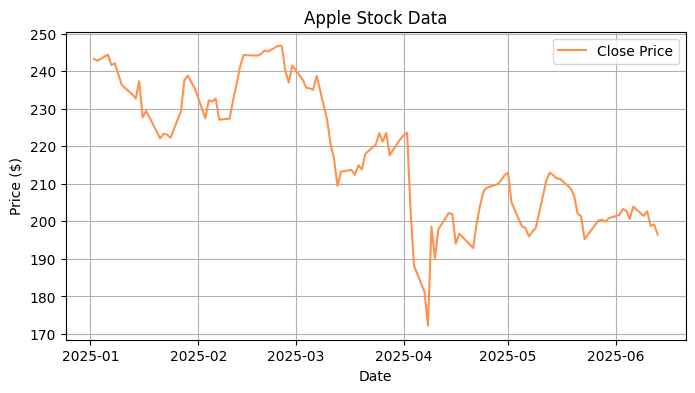

In [22]:
plt.figure(figsize=(8,4))
plt.plot(stock_data.index, stock_data['Close'], label = "Close Price", color = "#FF914D")
plt.title("Apple Stock Data")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

### Classical Time Series Decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period=30)

In [25]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

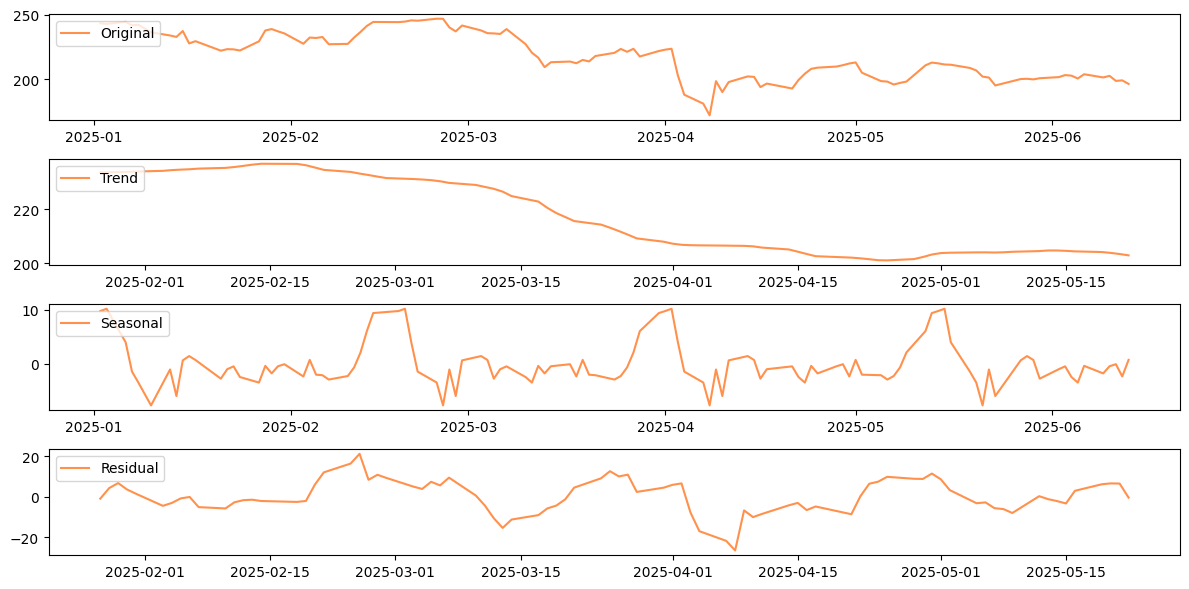

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color ='#FF914D')
plt. legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color = '#FF914D')
plt. legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## STL Decomposition

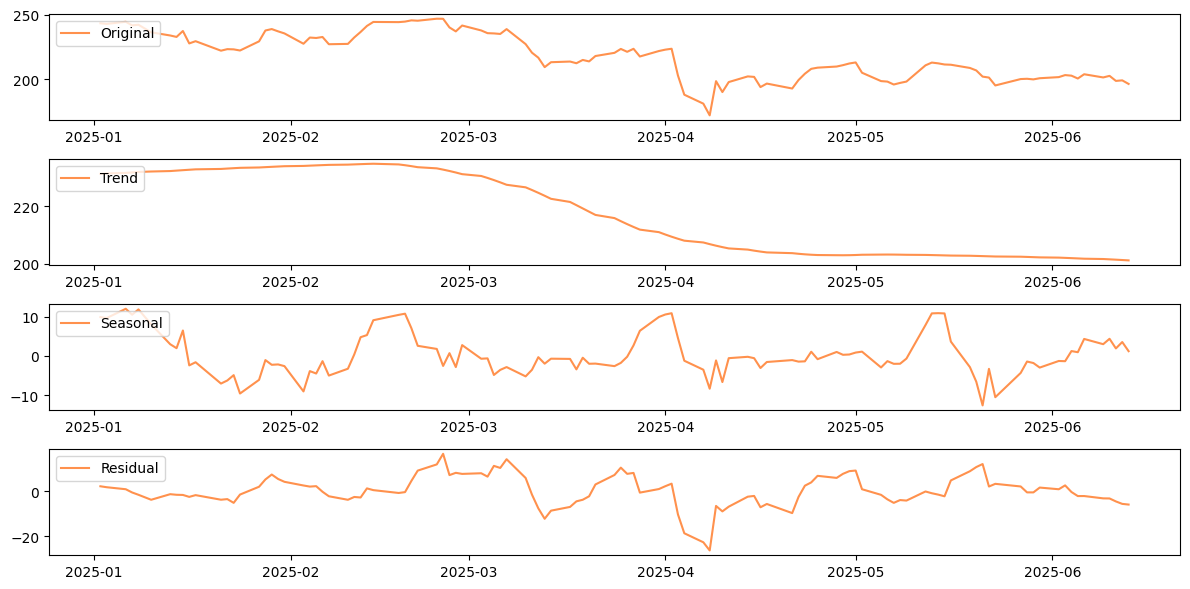

In [29]:
from statsmodels.tsa.seasonal import STL


# Perform STL decomposition
stl = STL(stock_data['Close'], period=30) 
result = stl.fit()

# Plot the decomposition components
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(result.observed, label='Original', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Stationarity Test

- ADF (Dickey Fuller) - Weak Stationarity
- KPSS - Weak Stationarity
- KSS - Strong Stationarity

In [36]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_data['Close'])
adf_test

print("ADF test results")
print(f"ADF Test Statistics: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")
print("Critical Values: ")
for key, item in adf_test[4].items():
    print(f"    {key}: {round(item, 5)}")

ADF test results
ADF Test Statistics: -1.6212371938217824
P-value: 0.47208074406666745
Critical Values: 
    1%: -3.493
    5%: -2.88895
    10%: -2.58139


**Null Hypothesis (H0):** The time series has a unit root (non-stationary). 

**Alternative Hypothesis (H1):** The time series is stationary.

- The ADF statistic is positive and very close to zero.

- The p-value is extremely high (0.4720), which is much greater than any typical significance level.

- The ADF statistic is significantly greater than all critical values.

Therefore, we fail to reject the null hypothesis. 

Conclusions: 

- Pvalue < 0.05 (Not Satisfied) ---> (Non Stationary)
- ADF Statistic < Critical Value (Not Satisfied) ---> (Non Stationary)

In [37]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(stock_data['Close'], regression='ct')
kpss_test

print("KPSS test results")
print(f"KPSS Test Statistics: {round(kpss_test[0],4)}")
print(f"P-value: {kpss_test[1]}")
print("Critical Values: ")
for key, item in kpss_test[3].items():
    print(f"    {key}: {round(item, 5)}")

KPSS test results
KPSS Test Statistics: 0.1363
P-value: 0.06798440484911983
Critical Values: 
    10%: 0.119
    5%: 0.146
    2.5%: 0.176
    1%: 0.216


**Null Hypothesis (H0):**  The time series is stationary.

**Alternative Hypothesis (H1):** The time series is non-stationary.

- The KPSS statistic is significantly larger than all critical values.

- The p-value is very low (0.06), which is less than any typical significance level.
  
Therefore, we reject the null hypothesis. This means there is strong evidence to suggest that the time series is non-stationary.

KS - Test 

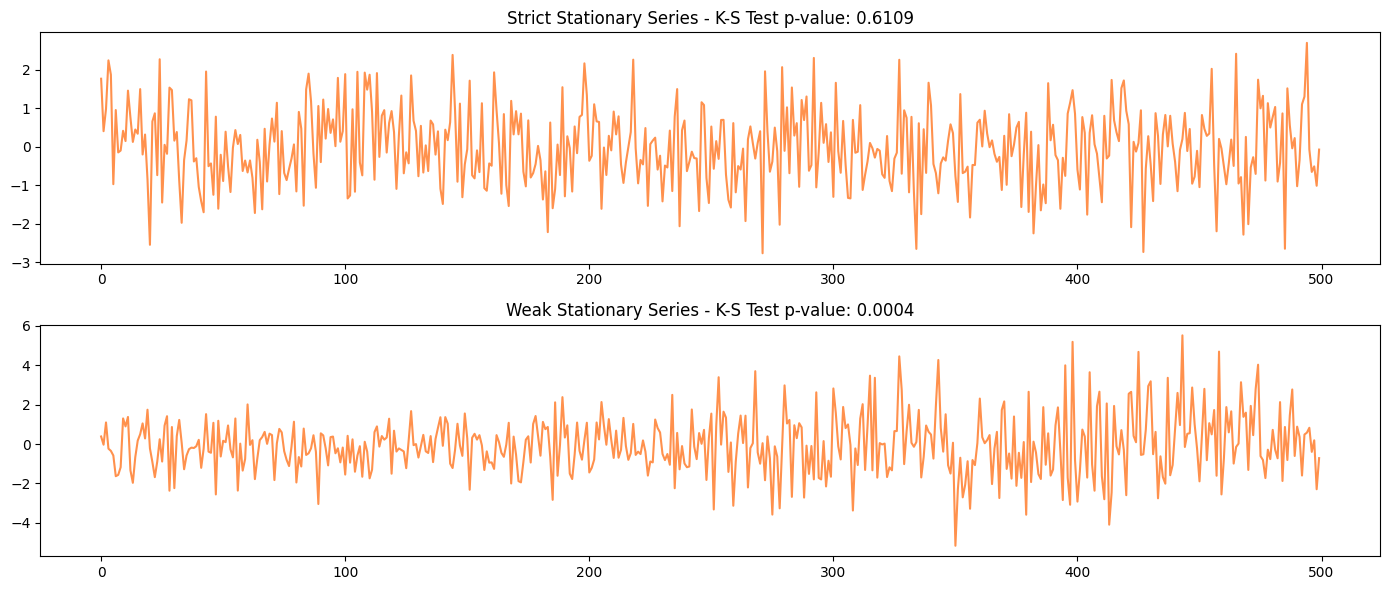

Strict Stationary Series - K-S Test Statistic: 0.068, p-value: 0.6109
Weak Stationary Series - K-S Test Statistic: 0.184, p-value: 0.0004


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

# Perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(strict_stationary_series, color = '#FF914D')
plt.title(f'Strict Stationary Series - K-S Test p-value: {ks_pvalue_strict:.4f}')

plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_series, color = '#FF914D')
plt.title(f'Weak Stationary Series - K-S Test p-value: {ks_pvalue_non_strict:.4f}')

plt.tight_layout()
plt.show()

print(f'Strict Stationary Series - K-S Test Statistic: {ks_stat_strict}, p-value: {ks_pvalue_strict:.4f}')
print(f'Weak Stationary Series - K-S Test Statistic: {ks_stat_non_strict}, p-value: {ks_pvalue_non_strict:.4f}')


A very low p-value (0.0004) strongly suggests that the empirical distribution of the series is significantly different from the theoretical distribution. This indicates that the series is likely not stationary in terms of its distribution.

A high p-value (0.6109) suggests that there is no significant difference between the empirical cumulative distribution function of the series and the theoretical distribution. This indicates that the series might be stationary in terms of its distribution.



## Making the data Stationary

- 1. Differencing
- 2. Transformation
- 3. Detrending
- 4. Deserialization

In [75]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Test Results")
    print(f"Test Statistics: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")

def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

In [40]:
prices = stock_data['Close']

In [47]:
adf_test(prices)

ADF Test Results
Test Statistics: -1.6212
P-value: 0.4721
Critical Values:
1%: -3.493
5%: -2.889
10%: -2.5814


Very High p-value -> Non Stationary

Will now proceed towards Differencing

### 1. Differencing

In [48]:
prices

Ticker,AAPL
Date,
2025-01-02,243.263199
2025-01-03,242.774368
2025-01-06,244.410416
2025-01-07,241.627136
2025-01-08,242.115952
...,...
2025-06-09,201.449997
2025-06-10,202.669998
2025-06-11,198.779999


First order differencing output

In [49]:
prices.diff()

Ticker,AAPL
Date,
2025-01-02,NaN
2025-01-03,-0.488831
2025-01-06,1.636047
2025-01-07,-2.783279
2025-01-08,0.488815
...,...
2025-06-09,-2.470001
2025-06-10,1.220001
2025-06-11,-3.889999


Second Order Differencing

In [50]:
prices.diff().diff()

Ticker,AAPL
Date,
2025-01-02,NaN
2025-01-03,NaN
2025-01-06,2.124878
2025-01-07,-4.419327
2025-01-08,3.272095
...,...
2025-06-09,-5.759995
2025-06-10,3.690002
2025-06-11,-5.110001


### 2. Transformation

In [64]:
prices

Ticker,AAPL
Date,
2025-01-02,243.263199
2025-01-03,242.774368
2025-01-06,244.410416
2025-01-07,241.627136
2025-01-08,242.115952
...,...
2025-06-09,201.449997
2025-06-10,202.669998
2025-06-11,198.779999


In [68]:
import numpy as np
from scipy import stats

# Log Transformation 
prices_log = np.log(prices)

# Sqrt Transformation 
prices_sqrt = np.sqrt(prices)

# Box-Cox Transformation
# Box cox require all positive values

prices_boxcox, lam = stats.boxcox(prices['AAPL'][prices['AAPL'] > 0])

In [69]:
prices_boxcox

array([259.45004912, 258.91879044, 260.69690222, 257.67204794,
       258.20325195, 251.86234175, 249.20742188, 247.99388779,
       252.96773929, 242.55576889, 244.4188324 , 236.46982685,
       237.75830867, 237.57424056, 236.62140656, 244.28885129,
       253.39042979, 254.5826664 , 252.66427991, 250.94119906,
       242.28498618, 247.47384058, 247.1163248 , 247.92889136,
       241.87342827, 242.16617123, 247.55592082, 252.16623435,
       257.22275509, 260.55478925, 260.41368908, 260.84785601,
       261.88995685, 261.58600923, 263.26865048, 263.20349674,
       255.95305521, 252.63276726, 257.55917644, 253.4247952 ,
       251.14643456, 250.94032057, 250.4955307 , 254.5532557 ,
       241.98185404, 234.78394992, 230.60112004, 222.69370011,
       226.82022817, 227.37267159, 225.95366102, 228.71597061,
       227.48099779, 231.99888707, 234.66472687, 237.93805618,
       235.53176389, 238.04645552, 231.59795841, 236.18208936,
       237.33103344, 238.08981546, 215.66718328, 199.64

In [70]:
adf_test(prices_boxcox)

ADF Test Results
Test Statistics: -1.6213
P-value: 0.4721
Critical Values:
1%: -3.493
5%: -2.889
10%: -2.5814


Even after boxcox, we are not able to get stationary data 

Lets try with Differencing

In [73]:
first_order_differencing = prices.diff()

In [76]:
adf_test(first_order_differencing.dropna())

ADF Test Results
Test Statistics: -6.263282248879271
P-value: 4.1726508723051003e-08
Critical Values:
1%: -3.492995948509562
5%: -2.888954648057252
10%: -2.58139291903223


In [77]:
4.1726508723051003e-08 < 0.05

True

We see that, Test Statistic < Critical values (Therefore can say, that it is stationary now)

p-value < 0.05

In [80]:
prices = prices['AAPL']

### 3. Detrending

- Linear

- Moving Averages (Rolling Mean)

i) Linear Detrending

In [81]:
from scipy import signal

trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

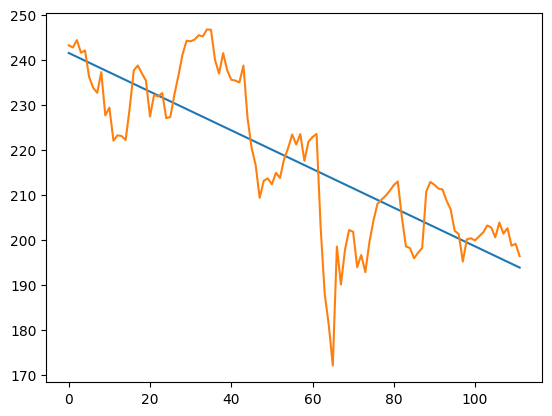

In [85]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [82]:
adf_test(prices_detrended)

ADF Test Results
Test Statistics: -3.5724822473298405
P-value: 0.006309431761541289
Critical Values:
1%: -3.49181775886872
5%: -2.8884437992971588
10%: -2.5811201893779985


Data is made Stationary using Linear Detrending as p-value < 0.05

ii) Moving Averages

In [86]:
window = 12
prices_ma = prices.rolling(window=window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

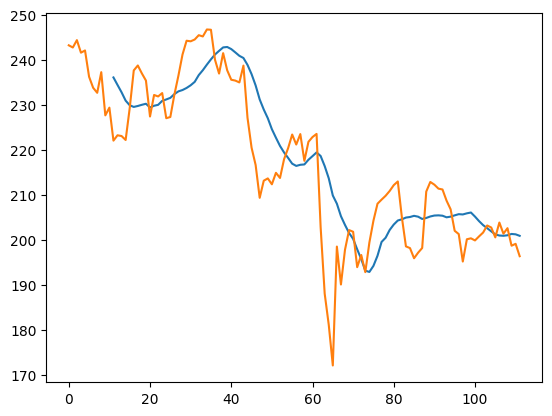

In [89]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [88]:
adf_test(prices_detrended)

ADF Test Results
Test Statistics: -4.4486804456841655
P-value: 0.0002431732407427483
Critical Values:
1%: -3.4989097606014496
5%: -2.891516256916761
10%: -2.5827604414827157


p-value < 0.05 

Test Statistics < Critical Value

Therefore, Data is made stationary using this as well

### 4. Deseasonalisation

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(prices, model = 'additive', period=30)
prices_adjusted = prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [91]:
adf_test(prices_adjusted)

ADF Test Results
Test Statistics: -4.825385320330173
P-value: 4.862013466089574e-05
Critical Values:
1%: -3.49181775886872
5%: -2.8884437992971588
10%: -2.5811201893779985


In [92]:
4.862013466089574e-05 < 0.05

True

P-value < 0.05 

Therefore Stationary Data made using this as well

## Time Series Forecasting models

Here we have used hit and trial based values for orders (p,d,q). But in actual practice, we will derive those values using ACF and PACF

In [94]:
apple_price_stationary = stock_data['Close'].diff().dropna()

train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

In [96]:
train_data.shape

(81, 1)

In [100]:
print(len(train_data))

81


In [101]:
print(len(train_data) + len(test_data) - 1)

110


## AR Model 

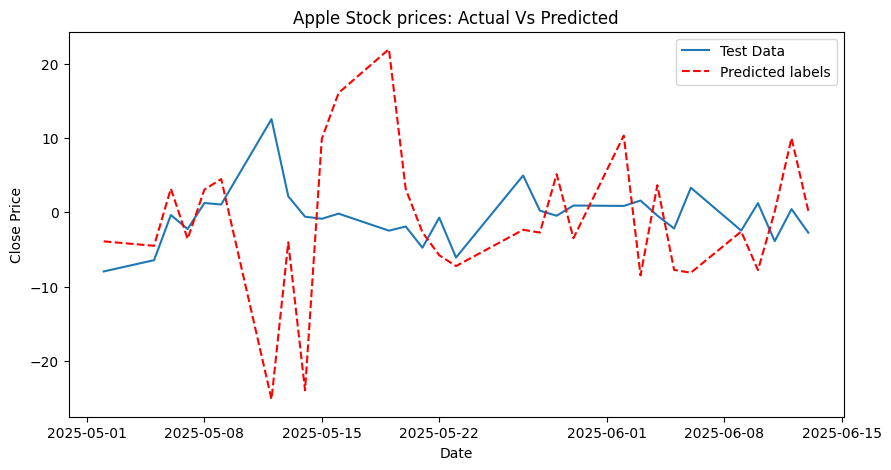

In [97]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

model = AutoReg(train_data,lags = 30)
model_fit = model.fit()

predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label = "Test Data")
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = "Predicted labels")
plt.title("Apple Stock prices: Actual Vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [103]:
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f"RMSE: {rmse}")

RMSE: 11.2


## MA Model

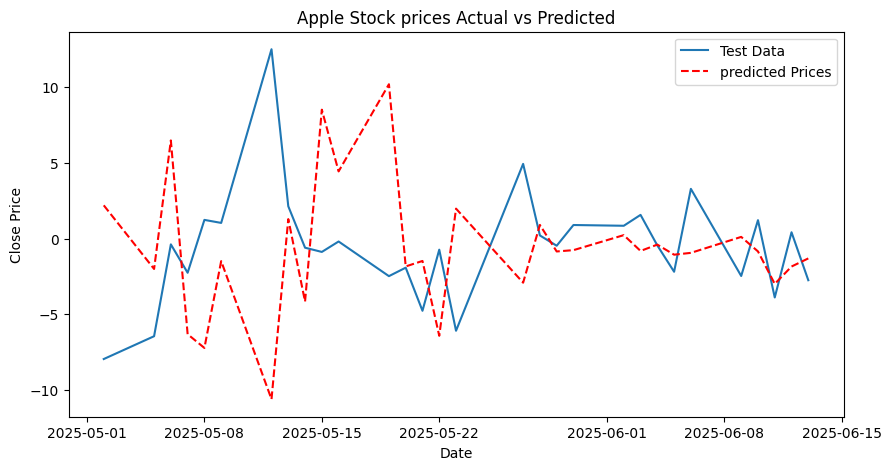

RMSE: 6.59


In [107]:
from statsmodels.tsa.arima.model import ARIMA

# We dont have any specific model for MA, so we can pass the last value in ARIMA, that will work like MA model 

model = ARIMA(train_data, order = (0,0, 30))
model_fit = model.fit()

# Make predictions on test data 
predictions = model_fit.predict(
    start = len(train_data), 
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, label = 'predicted Prices', color = 'red', linestyle = '--')
plt.title("Apple Stock prices Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f"RMSE: {rmse}")

## ARMA Model

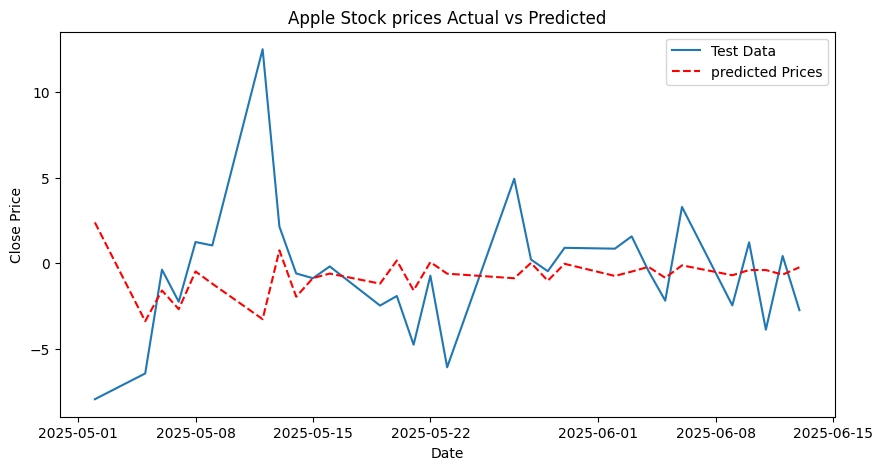

RMSE: 4.11


In [108]:
# We dont have any specific model for ARMA, so we can pass the middle value in ARIMA as 0, that will work like ARMA model 

model = ARIMA(train_data, order = (7,0,7))
model_fit = model.fit()

# Make predictions on test data 
predictions = model_fit.predict(
    start = len(train_data), 
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, label = 'predicted Prices', color = 'red', linestyle = '--')
plt.title("Apple Stock prices Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f"RMSE: {rmse}")

## ARIMA Model

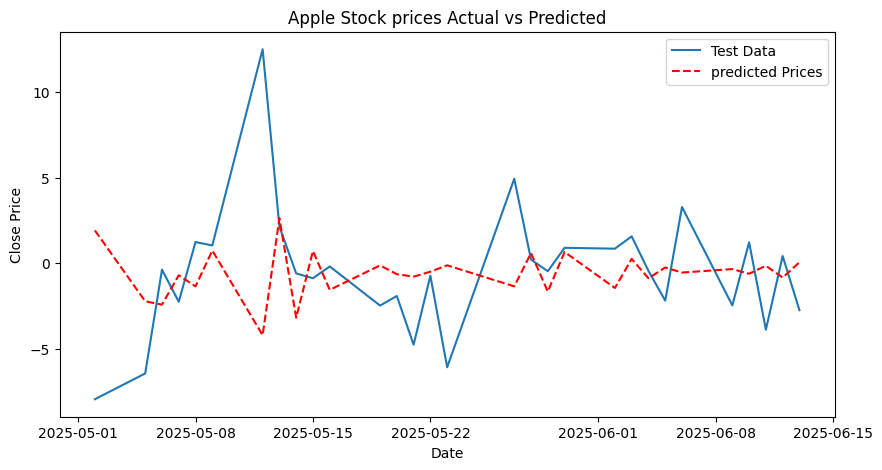

RMSE: 4.39


In [110]:
model = ARIMA(train_data, order = (7,1,7))
model_fit = model.fit()

# Make predictions on test data 
predictions = model_fit.predict(
    start = len(train_data), 
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, label = 'predicted Prices', color = 'red', linestyle = '--')
plt.title("Apple Stock prices Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f"RMSE: {rmse}")

## SARIMA Model

Selecting order value based on this. 
We can see that the values are repeating after every 45-50 days so got a gist of selecting the values in this range

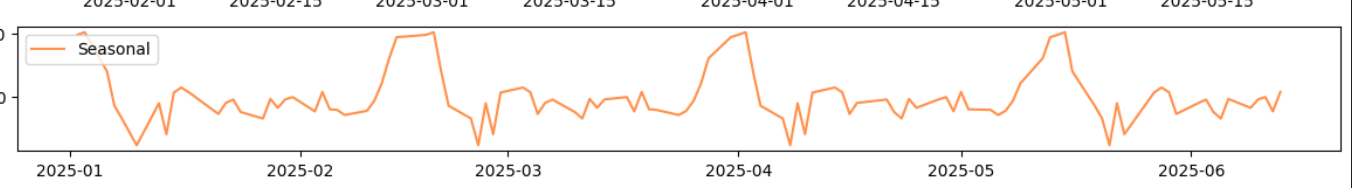

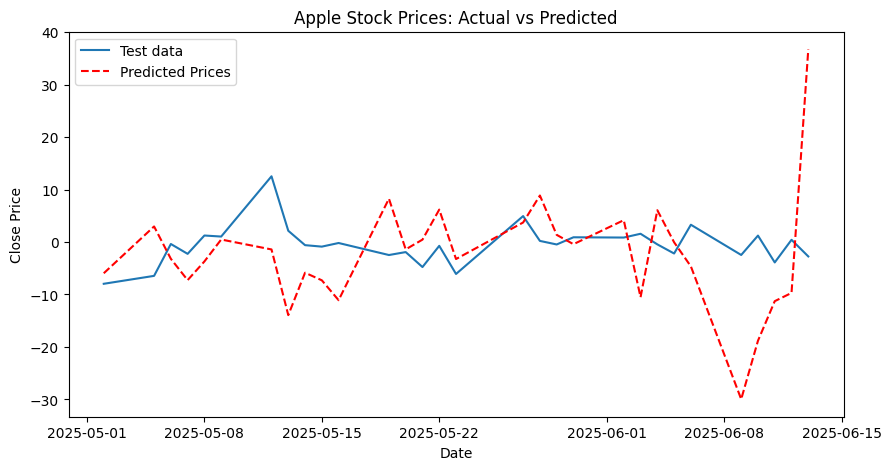

RMSE:  11.85


In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

p, d, q = 5, 1, 5   # Selected these valeus via hit and trial
P, D, Q, s = 1, 1, 1, 45  
  
# Fit the SARIMA model 
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s)) 
model_fit = model.fit() 

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE: ',rmse)

## Vector Models

In the models above, we were using just the 'Close price' to predict our values. But here we can do it by making use of other time series as well

We are trying to find if Today's price of AAPL can help predict tomorrow's price of TSLA?

In [119]:

tsla_data = yf.download('TSLA', start='2023-01-01')

stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(stock_data[['APPL_Close', 'TSLA_Close']].dropna(), maxlag=[14])
print()

[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=3.9833  , p=0.0001  , df_denom=68, df_num=14
ssr based chi2 test:   chi2=79.5488 , p=0.0000  , df=14
likelihood ratio test: chi2=58.0920 , p=0.0000  , df=14
parameter F test:         F=3.9833  , p=0.0001  , df_denom=68, df_num=14



The results shows that yes today's price of AAPL affect tomorrows price of TSLA

grangercausalitytests - helps us find out if data of one time series affect the other time series?

In [120]:
stock_data

Price,Close,High,Low,Open,Volume,TSLA_Close,APPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2025-01-03,242.774368,243.592387,241.307905,242.774368,40244100,410.440002,243.263199
2025-01-06,244.410416,246.734810,242.614744,243.722074,45045600,411.049988,242.774368
2025-01-07,241.627136,244.959095,240.769205,242.395272,40856000,394.359985,244.410416
2025-01-08,242.115952,243.123531,239.472335,241.337830,37628900,394.940002,241.627136
2025-01-10,236.280045,239.582077,232.439303,239.432429,61710900,394.739990,242.115952
...,...,...,...,...,...,...,...
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,308.579987,203.919998
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,326.089996,201.449997


In [121]:
tsla_data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000
...,...,...,...,...,...
2025-06-10,326.089996,327.829987,310.670013,314.940002,151256500
2025-06-11,326.429993,335.500000,322.500000,334.399994,122611400


In [122]:

data = stock_data[['APPL_Close','TSLA_Close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

In [124]:
import pandas as pd

## VAR Model

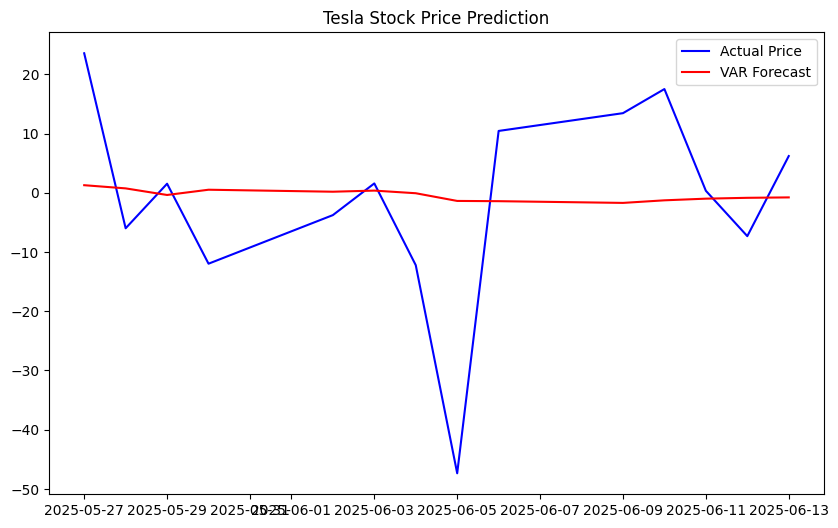

RMSE:  16.46


In [125]:
from statsmodels.tsa.api import VAR, VARMAX

# VAR
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VAR Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])),2)
print('RMSE: ',rmse)

## VMA Model 

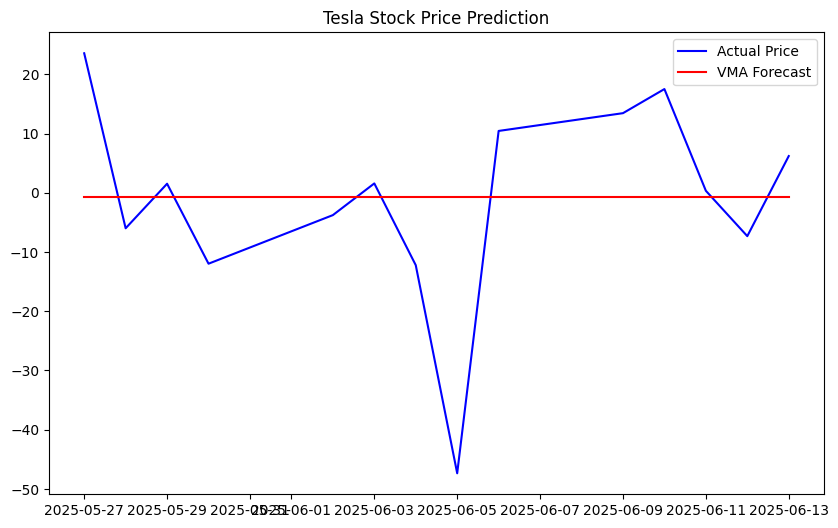

RMSE:  16.52


In [126]:
# VMA
model = VARMAX(train_data, order = (0,14))
result = model.fit()
predictions = result.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VMA Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])),2)
print('RMSE: ',rmse)

## VARIMA

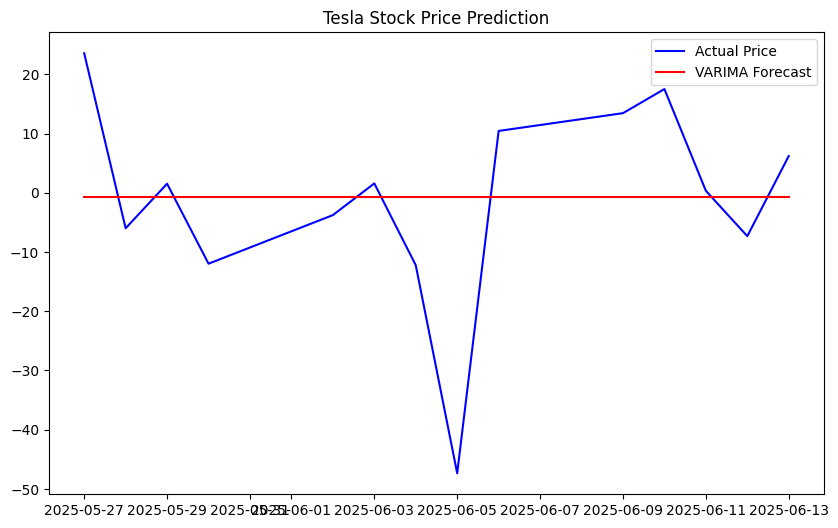

RMSE:  16.52


In [127]:
# VARIMA
model = VARMAX(train_data, order = (14,14))
result = model.fit()
predictions = result.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VARIMA Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])),2)
print('RMSE: ',rmse)

## Smoothing Methods

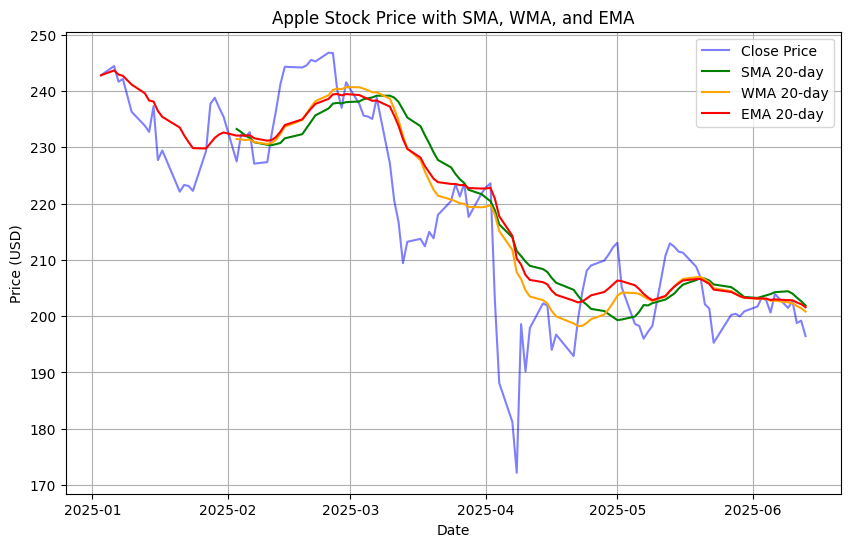

In [129]:
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

# Calculate Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SMA {window_size}-day', color='green')
plt.plot(stock_data['WMA'], label=f'WMA {window_size}-day', color='orange')
plt.plot(stock_data['EMA'], label=f'EMA {window_size}-day', color='red')

plt.title('Apple Stock Price with SMA, WMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()